In [2]:
import plumed
import matplotlib.pyplot as plt
import mdtraj as md
import numpy as np

In [3]:
# import COLVAR file as pandas dataset
# set the right path to the COLVAR file
data=plumed.read_as_pandas("COLVAR")
# print pandas dataset
data

<ipython-input-3-ee0a61664abe>:3: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("COLVAR")


,time,phi,psi
0,0.0,1.160430,0.128043
1,0.2,1.047068,-0.512618
2,0.4,0.684148,-1.695497
3,0.6,1.099972,-1.504469
4,0.8,1.068988,-0.332609
...,...,...,...
49996,9999.2,1.191183,-1.101866
49997,9999.4,1.147343,-0.466726
49998,9999.6,1.267685,-0.580472
49999,9999.8,0.983870,-1.045021


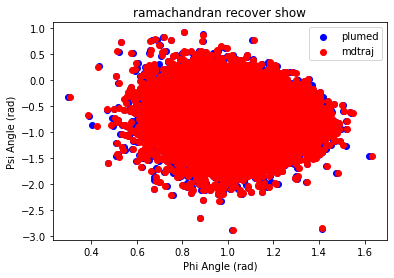

In [4]:
#load data
time, phi, psi = np.loadtxt('COLVAR', unpack=True)
traj = md.load_xtc('traj_comp.xtc', top='dialaA.pdb')

phi_angles = md.compute_phi(traj) 
psi_angles = md.compute_psi(traj)

plt.scatter(phi, psi, label = 'plumed',marker='o',c='b') #from plumed

plt.scatter(phi_angles[1], psi_angles[1], label = 'mdtraj',marker='o',c='r') #from mdtraj

plt.xlabel('Phi Angle (rad)')
plt.ylabel('Psi Angle (rad)')
plt.title('ramachandran recover show')
plt.legend()
plt.savefig('diala-master-A-ramachandran,step 100')

plt.show()

In [5]:
np.std(phi) 

0.1315162227684856

In [6]:
np.std(psi) 

0.3429175983773882

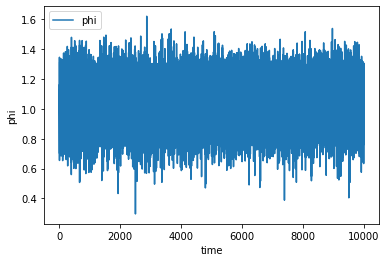

In [7]:
data.time,data.phi=data.time,data.phi
plt.plot(data.time,data.phi,label="phi")
# x-y axis labels
plt.xlabel("time")
plt.ylabel("phi")
plt.legend()

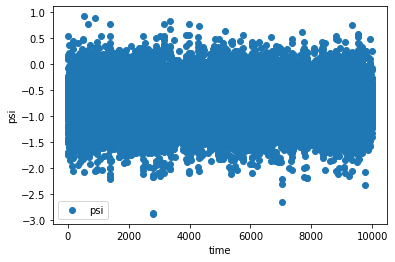

In [8]:
data.time,data.psi=data.time,data.psi
plt.scatter (data.time,data.psi, label="psi")
# x-y axis labels
plt.xlabel("time")

plt.ylabel("psi")
plt.legend()

In [9]:
traj = md.load_xtc('traj_comp.xtc', top='confout.gro')
a,phi = md.compute_phi(traj)
b,psi = md.compute_psi(traj)

In [10]:
print(psi)
print(len(psi))

[[ 0.13115838]
 [-0.5171774 ]
 [-1.7025892 ]
 ...
 [-0.5775316 ]
 [-1.0557199 ]
 [-0.9479047 ]]
50001


NameError: name 'numpy' is not defined

<Figure size 864x288 with 0 Axes>

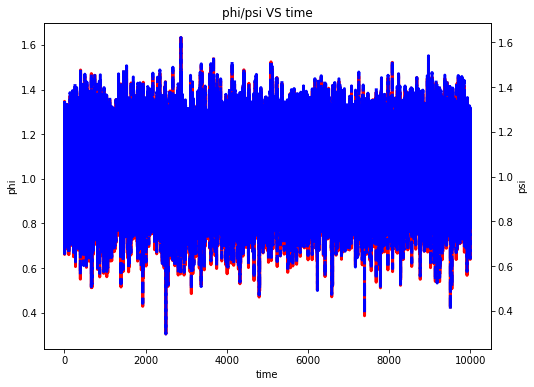

In [18]:
fig = plt.figure(figsize=(12,4)) 
x_a = traj.time
y_a1 =phi
y_a2 =data.phi
fig = plt.figure(num=3,figsize=(8,6),facecolor='w')
ax1 = fig.add_subplot(111)
ax1.plot(x_a, y_a1,'r',linewidth=3,linestyle='solid')
ax1.set_ylabel('phi')
ax1.set_title("phi/psi VS time")
ax2 = ax1.twinx()  # this is the important function
ax2.plot(x_a, y_a2, 'b',linewidth=3,linestyle='dashed')
#ax2.set_xlim([0, np.e])
ax2.set_ylabel('psi')
ax1.set_xlabel('time')
plt.show()